<a href="https://colab.research.google.com/github/QuangHuy1124/du_an_da_lam/blob/main/Ph%C3%A2n_t%C3%ADch_d%E1%BB%AF_li%E1%BB%87u_b%C3%A1n_h%C3%A0ng_tr%E1%BB%B1c_tuy%E1%BA%BFn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ẨN thông báo warnings
import warnings
warnings.filterwarnings("ignore")

# Đọc dữ liệu

- Series là 1 cột
- DataFrame là 1 bảng gồm nhiều Series

In [ ]:
path = r'G:\NEU\data\OnlineRetail.csv' #Mọi file nếu k đọc được cách thông thường thì sửa thành .txt
df = pd.read_csv(path)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
203417,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom
203418,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom
203419,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom
203420,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom


### Hãy hiểu cả bộ dữ liệu và từng biến nói lên điều gì? Có đúng định dạng hay k? Có giá trị thiếu hay k?

- int 64 là tập hợp các số nguyên từ $2^{-64}$ -> $2^{64}$ số, có thể giảm xuống để load data nhanh hơn
- Kết hợp dữ liệu:
+ Concat là xếp chồng dữ liệu cần quan tâm tham số axis và ignore_index
+ Merge như hàm VLOCKUP excel cần quan tâm tham số on (left_on hoặc right_on), how

In [ ]:
#Đây là data hóa đơn bán hàng
# -> 'CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate' không được phép thiếu
# -> 'UnitPrice', 'Quantity' > 0 vì giá và sản lượng mua hàng k thể <0 hoặc âm được
# -> Các cột còn lại có thể thiếu cũng được nhưng hãy xem xét kỹ trước khi xử lí giá trị thiếu

display(df.info()) #Đầu tiên hãy xem trước các kiểu định dạng và có bao nhiêu giá trị NULL trong dữ liệu

display(df.isna().sum()) #Ktra tổng giá trị NULL của từng biến

df = df.dropna(subset=['CustomerID']) #Đây là data hóa đơn bán hàng mà cột CustomerID có gtrị NULL -> Dữ liệu sai vì khi mua hàng đúng auto có
display(df)

display(df.dtypes) #Ktra định dạng từng cột
df['CustomerID'] = df['CustomerID'].astype(int).astype(str) #Chuyển định dạnh sang int để mất số 0 sau đó chuyển sang kiểu str
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) ##Chuyển định dạnh sang datetime

display(df.info()) #Ktra lại dữ liệu

df = df.drop_duplicates(ignore_index=True) #Xóa các bản ghi trùng lặp
display(df) #Ktra lại dữ liệu

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)] #Sản lượng mua hàng và giá tiền phải > 0

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Tạo cột 'TotalPrice' bằng cách nhân cột 'Quantity' với cột 'UnitPrice'
df.to_csv(r"G:\NEU\data\OnlineRetail_Clean.csv") #Lưu data mới đã được làm sạch

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203422 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    203422 non-null  object 
 1   StockCode    203422 non-null  object 
 2   Description  202623 non-null  object 
 3   Quantity     203422 non-null  int64  
 4   InvoiceDate  203422 non-null  object 
 5   UnitPrice    203422 non-null  float64
 6   CustomerID   150039 non-null  float64
 7   Country      203422 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.4+ MB


None

InvoiceNo          0
StockCode          0
Description      799
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     53383
Country            0
dtype: int64

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom
...,...,...,...,...,...,...,...,...
203417,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom
203418,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom
203419,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom
203420,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891.0,United Kingdom


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 150039 entries, 0 to 203421
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    150039 non-null  object        
 1   StockCode    150039 non-null  object        
 2   Description  150039 non-null  object        
 3   Quantity     150039 non-null  int64         
 4   InvoiceDate  150039 non-null  datetime64[ns]
 5   UnitPrice    150039 non-null  float64       
 6   CustomerID   150039 non-null  object        
 7   Country      150039 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 10.3+ MB


None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom
...,...,...,...,...,...,...,...,...
148544,558637,22032,BOTANICAL LILY GREETING CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom
148545,558637,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom
148546,558637,22033,BOTANICAL ROSE GREETING CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom
148547,558637,22029,SPACEBOY BIRTHDAY CARD,12,2011-06-30 20:08:00,0.42,17891,United Kingdom


### Xem data sâu hơn (phần này nên dùng biểu đồ trực quan chứ dùng dữ liệu thì excel nhanh hơn)

In [ ]:
df_quantity = df.groupby('Country')['Quantity'].sum()
print('Top 5 nước có Quantity cao nhất là: ')
display(df_quantity.sort_values(ascending=False).head())
print('Top 5 nước có Quantity thấp nhất là: ')
display(df_quantity.sort_values(ascending=True).head())

#Xem các hóa đơn theo từng quốc gia
UK = df[df['Country'] == 'United Kingdom']
display(UK.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False))

#Xem cụ thể hóa đơn bất kỳ
UK_user = UK[UK['InvoiceNo'] == '539993']
display(UK_user)

Top 5 nước có Quantity cao nhất là: 


Country
United Kingdom    1606853
Netherlands         93080
Australia           49968
Germany             47226
EIRE                46549
Name: Quantity, dtype: int64

Top 5 nước có Quantity thấp nhất là: 


Country
Saudi Arabia           80
USA                   137
European Community    164
Bahrain               260
Israel                286
Name: Quantity, dtype: int64

InvoiceNo
541431    74215
556267     9811
550461     9014
540815     7044
546789     6100
          ...  
540945        1
545061        1
548403        1
551697        1
541505        1
Name: Quantity, Length: 6657, dtype: int64

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,12.5
5,539993,85099B,JUMBO BAG RED RETROSPOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,19.5
6,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-01-04 10:00:00,3.25,13313,United Kingdom,19.5
7,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04 10:00:00,1.45,13313,United Kingdom,17.4
8,539993,22667,RECIPE BOX RETROSPOT,6,2011-01-04 10:00:00,2.95,13313,United Kingdom,17.7
9,539993,22898,CHILDRENS APRON APPLES DESIGN,8,2011-01-04 10:00:00,1.95,13313,United Kingdom,15.6


# **Trực quan hóa dữ liệu**

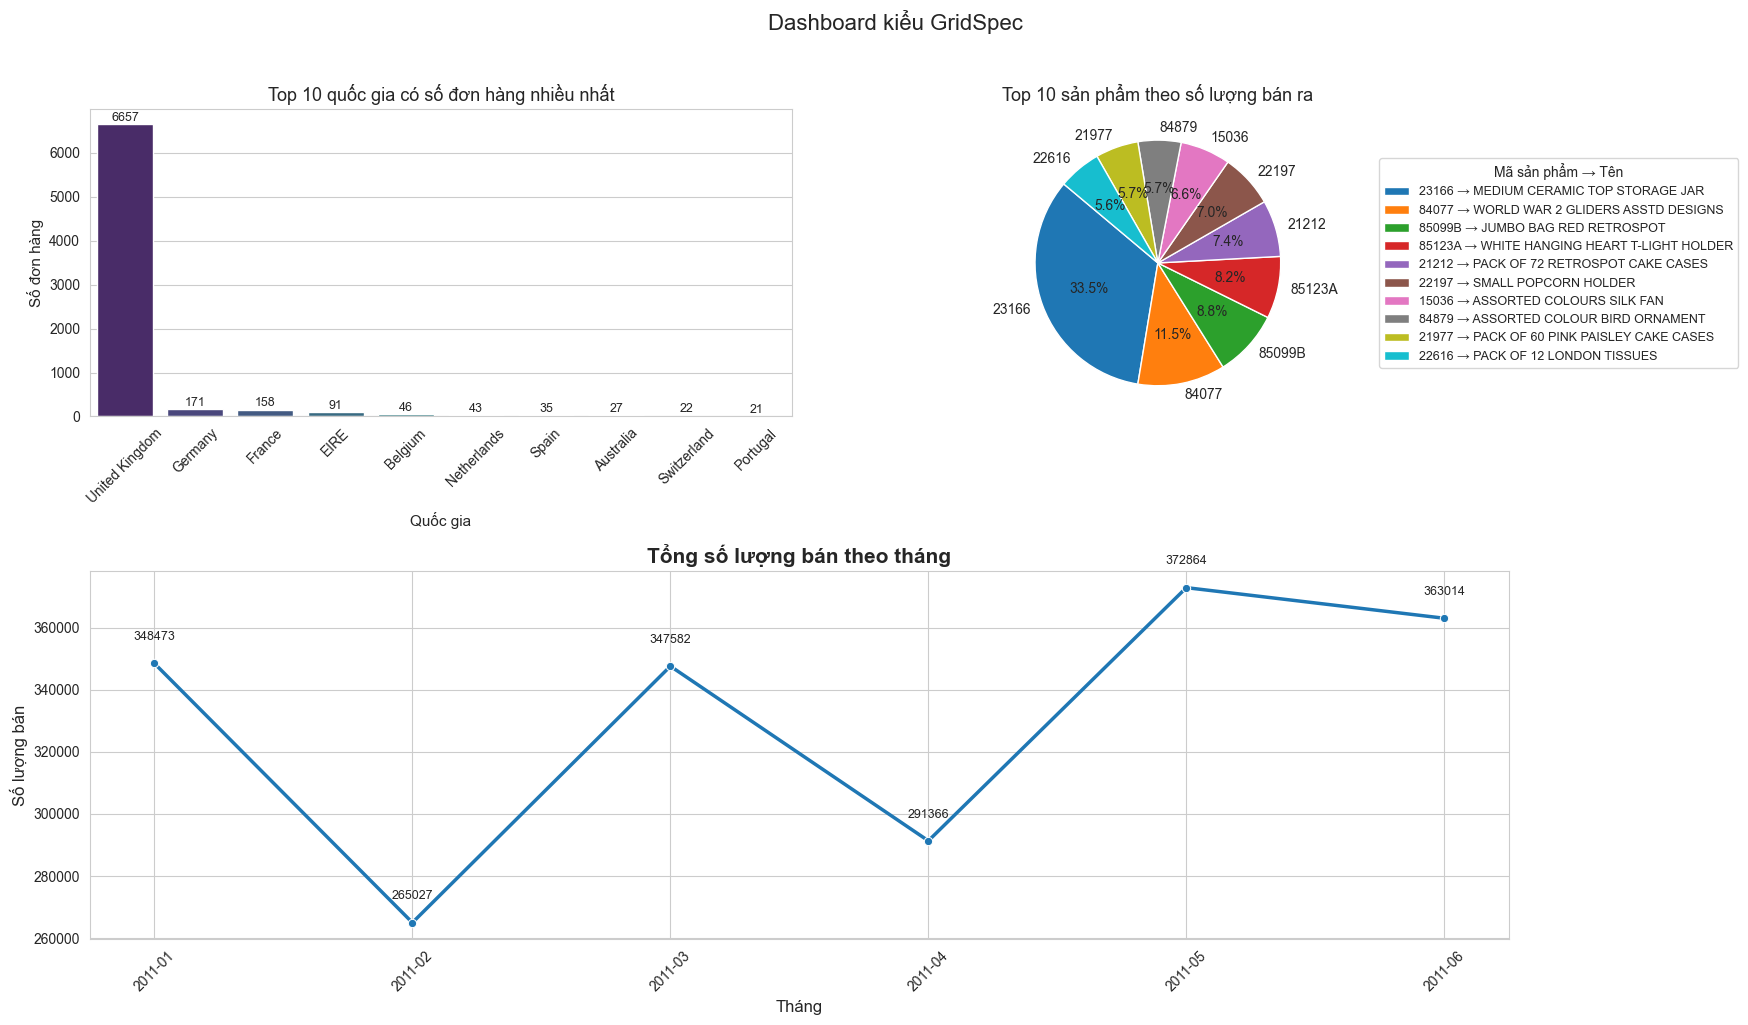

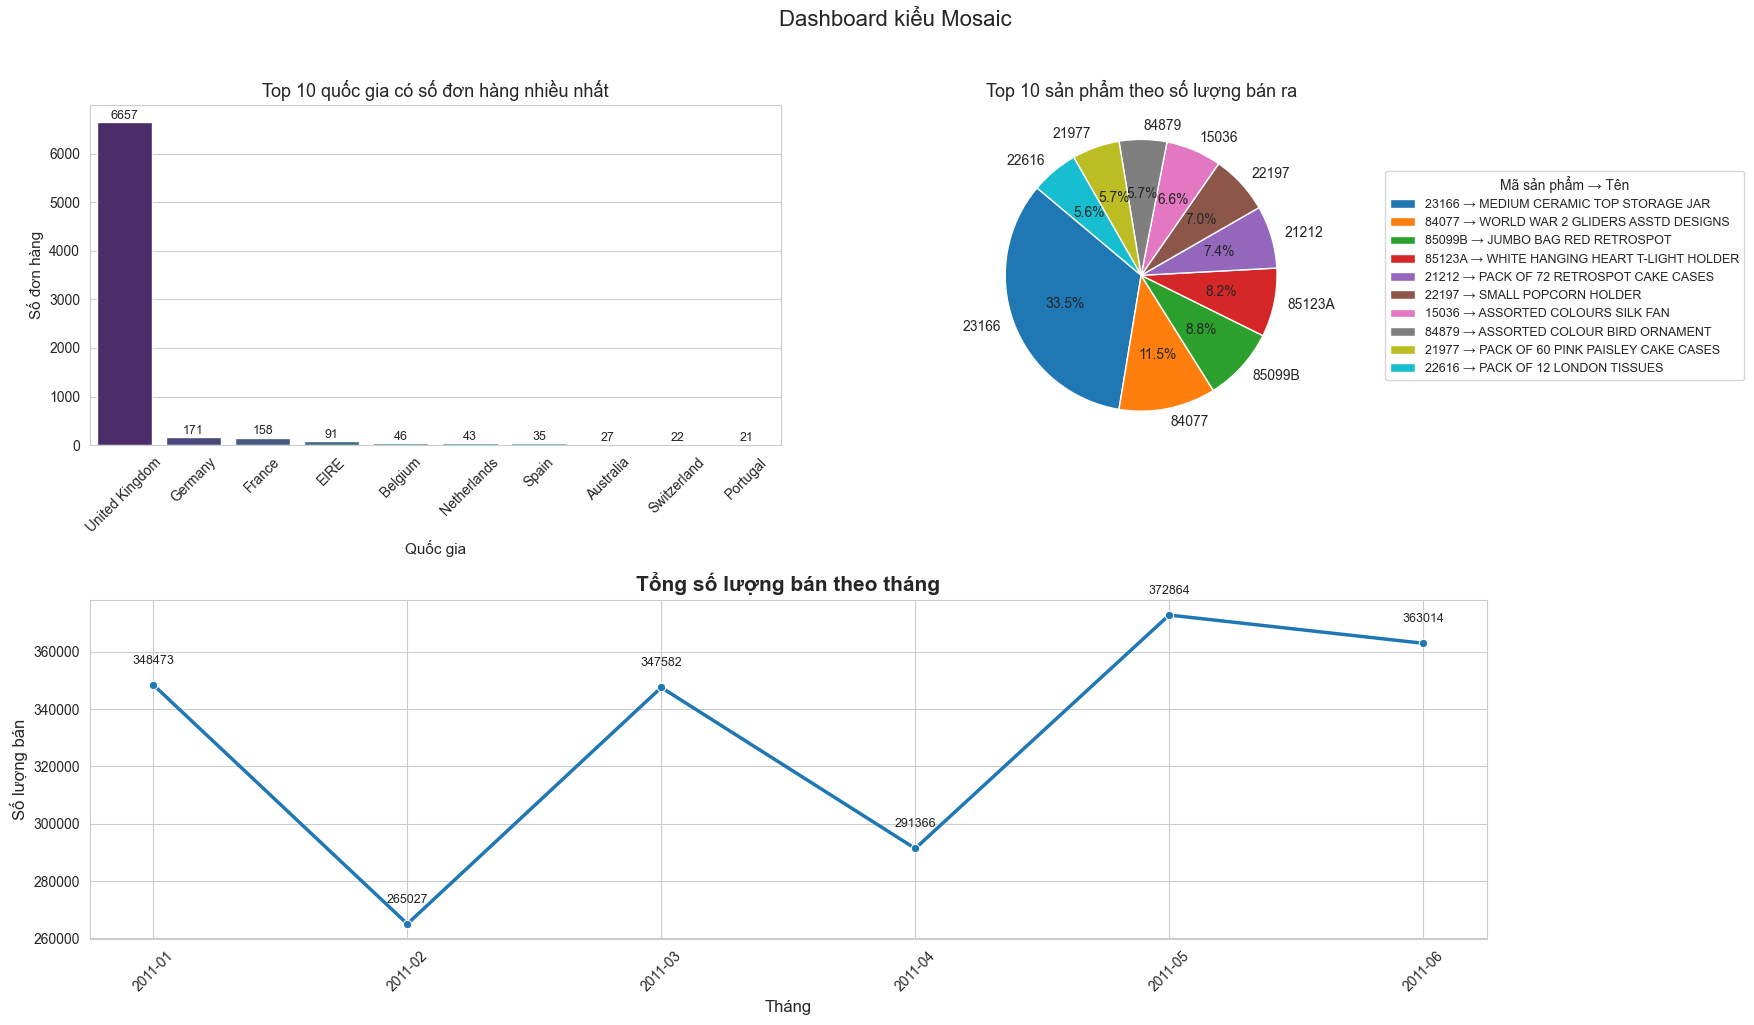

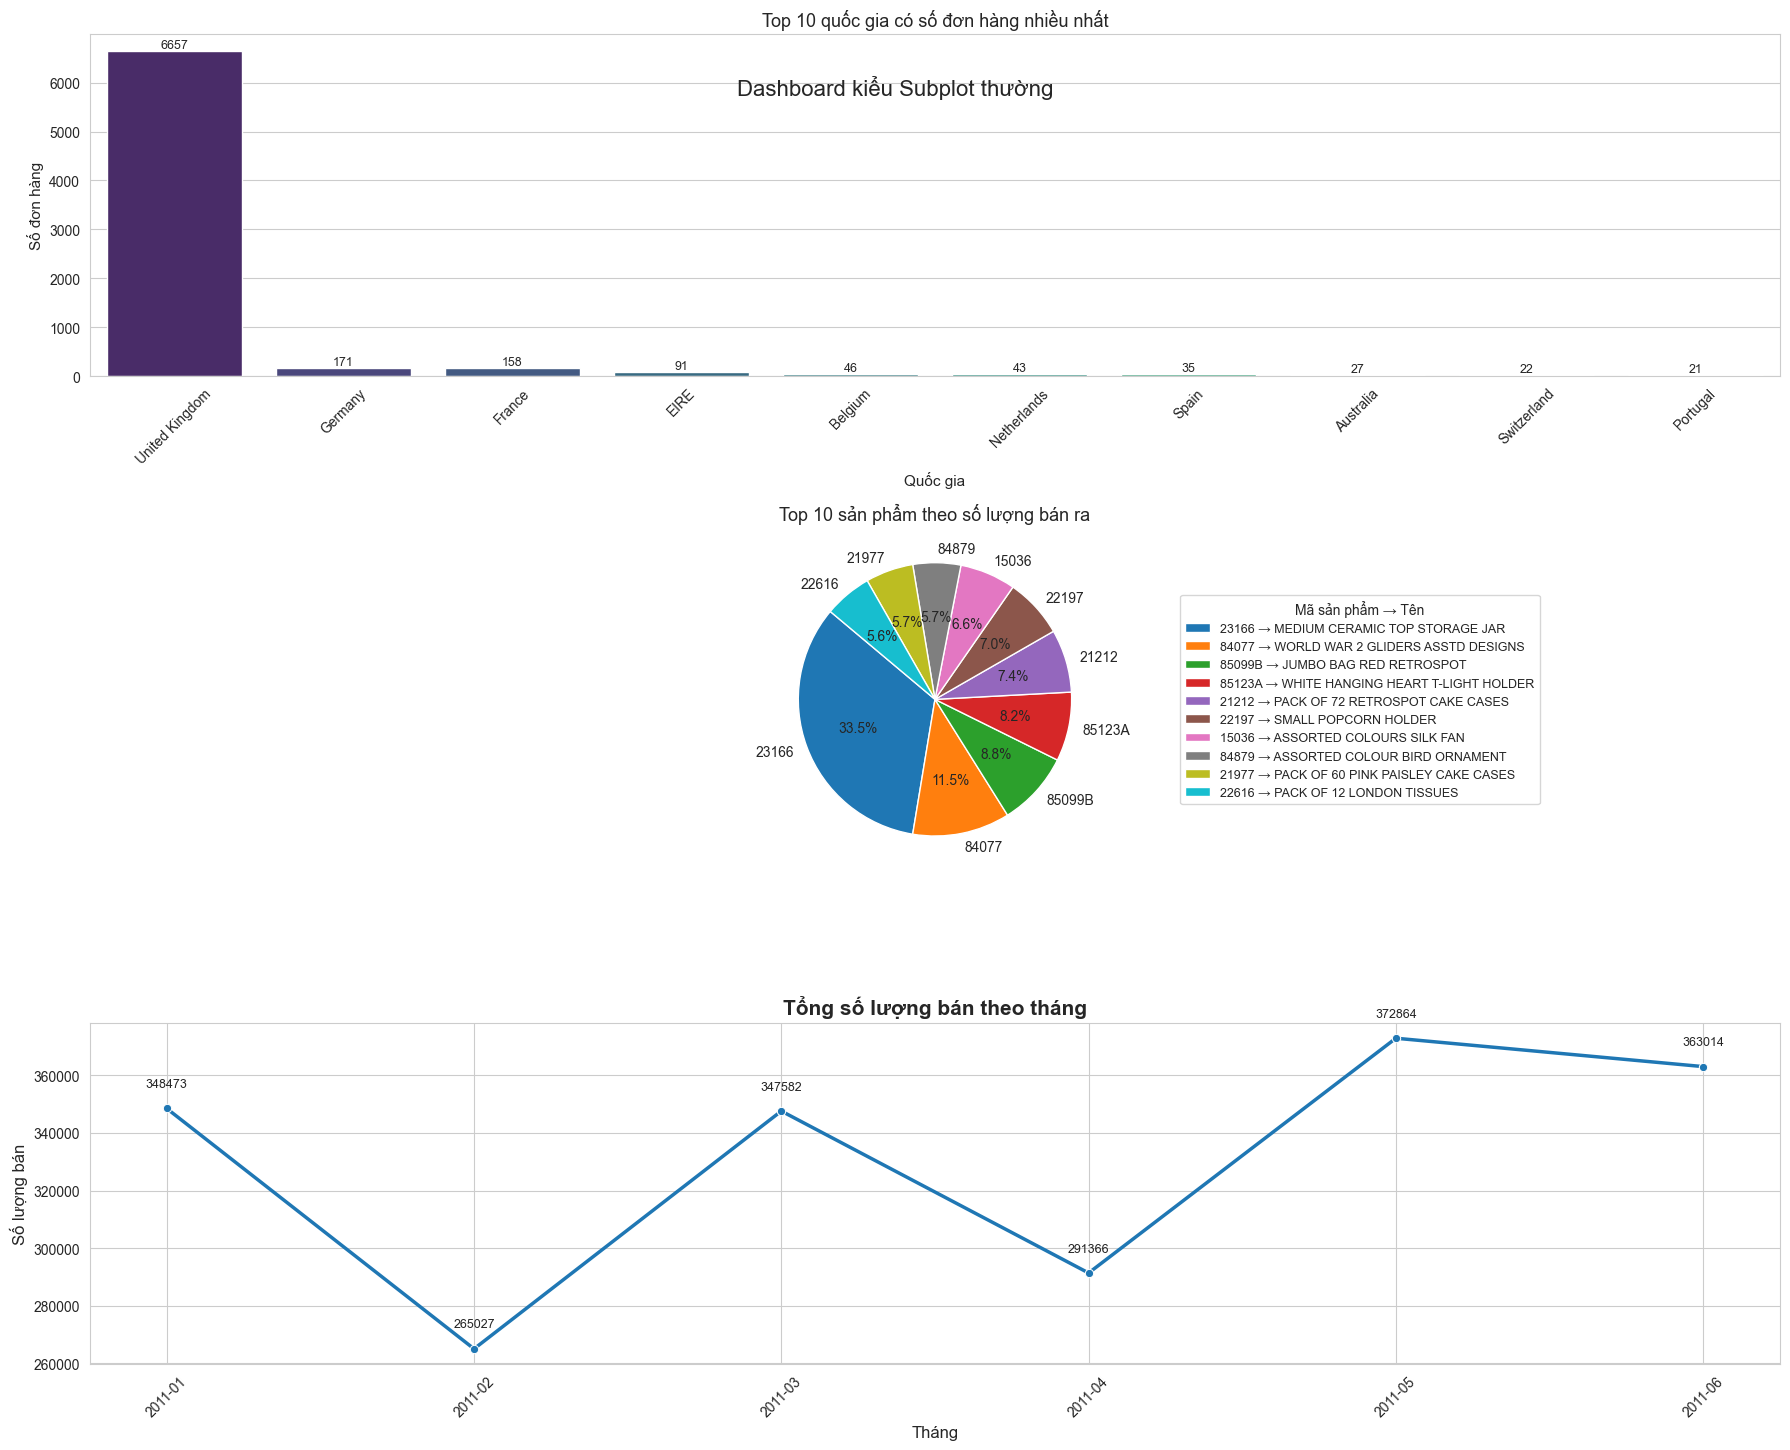

In [ ]:
#Cách vẽ dashboard còn VD dưới đây là cách gộp nhiều dashboard
sns.set_style("whitegrid")

# Chuẩn hóa dữ liệu
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Dữ liệu dùng chung cho cả 3 dashboard
orders_per_country = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)
df_sq = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).reset_index()
top10 = df_sq.head(10)
df_line = df.groupby('Month')['Quantity'].sum()
df_line.index = df_line.index.astype(str)

# Hàm vẽ dashboard (dùng chung)
def plot_dashboard(ax1, ax2, ax3):
    # Bar chart
    sns.barplot(x=orders_per_country.index[:10], y=orders_per_country.values[:10], palette="viridis", ax=ax1)
    ax1.set_title("Top 10 quốc gia có số đơn hàng nhiều nhất", fontsize=13)
    ax1.set_xlabel("Quốc gia", fontsize=11)
    ax1.set_ylabel("Số đơn hàng", fontsize=11)
    ax1.tick_params(axis='x', rotation=45)
    for i, v in enumerate(orders_per_country.values[:10]):
        ax1.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

    # Pie chart
    ax2.pie(
        top10['Quantity'],
        labels=top10['StockCode'],
        autopct='%1.1f%%',
        startangle=140
    )
    legend_labels = list(map(lambda x: x[0] + " → " + x[1], zip(top10['StockCode'], top10['Description'])))
    ax2.legend(legend_labels, loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize=9, title="Mã sản phẩm → Tên")
    ax2.set_title('Top 10 sản phẩm theo số lượng bán ra', fontsize=13)

    # Line chart
    sns.lineplot(x=df_line.index, y=df_line.values, marker='o', linewidth=2.5, ax=ax3)
    ax3.set_title("Tổng số lượng bán theo tháng", fontsize=15, fontweight='bold')
    ax3.set_xlabel("Tháng", fontsize=12)
    ax3.set_ylabel("Số lượng bán", fontsize=12)
    ax3.tick_params(axis='x', rotation=45)
    for x, y in zip(df_line.index, df_line.values):
        ax3.text(x, y + df_line.max()*0.02, str(y), ha='center', fontsize=9)

# =========================
# 1️⃣ Gridspec layout
# =========================
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
plot_dashboard(ax1, ax2, ax3)
fig.suptitle("Dashboard kiểu GridSpec", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# =========================
# 2️⃣ Mosaic layout
# =========================
layout = """
AB
CC
"""
fig, axs = plt.subplot_mosaic(layout, figsize=(18, 10))
plot_dashboard(axs['A'], axs['B'], axs['C'])
fig.suptitle("Dashboard kiểu Mosaic", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# =========================
# 3️⃣ Subplot thường
# =========================
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 15))
plot_dashboard(ax1, ax2, ax3)
fig.suptitle("Dashboard kiểu Subplot thường", fontsize=16, y=0.92)
plt.tight_layout()
plt.show()


# **Vận dụng thực tế**

'RFM data: '

,Recency,Frequency,Money
CustomerID,,,
12346,164,1,77183.60
12347,22,3,1494.16
12348,87,2,594.44
12350,149,1,334.40
12352,101,5,1561.81


' RFM Data apply qcut '

,Recency,Frequency,Money,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346,164,1,77183.60,1,1,5
12347,22,3,1494.16,4,4,5
12348,87,2,594.44,2,3,3
12350,149,1,334.40,1,1,2
12352,101,5,1561.81,2,5,5


' RFM Data Apply Segment '

,Recency,Frequency,Money,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12346,164,1,77183.60,1,1,5,115,7,At Risk
12347,22,3,1494.16,4,4,5,445,13,Loyal Customers
12348,87,2,594.44,2,3,3,233,8,Potential Loyalist
12350,149,1,334.40,1,1,2,112,4,Needs Attention
12352,101,5,1561.81,2,5,5,255,12,Loyal Customers


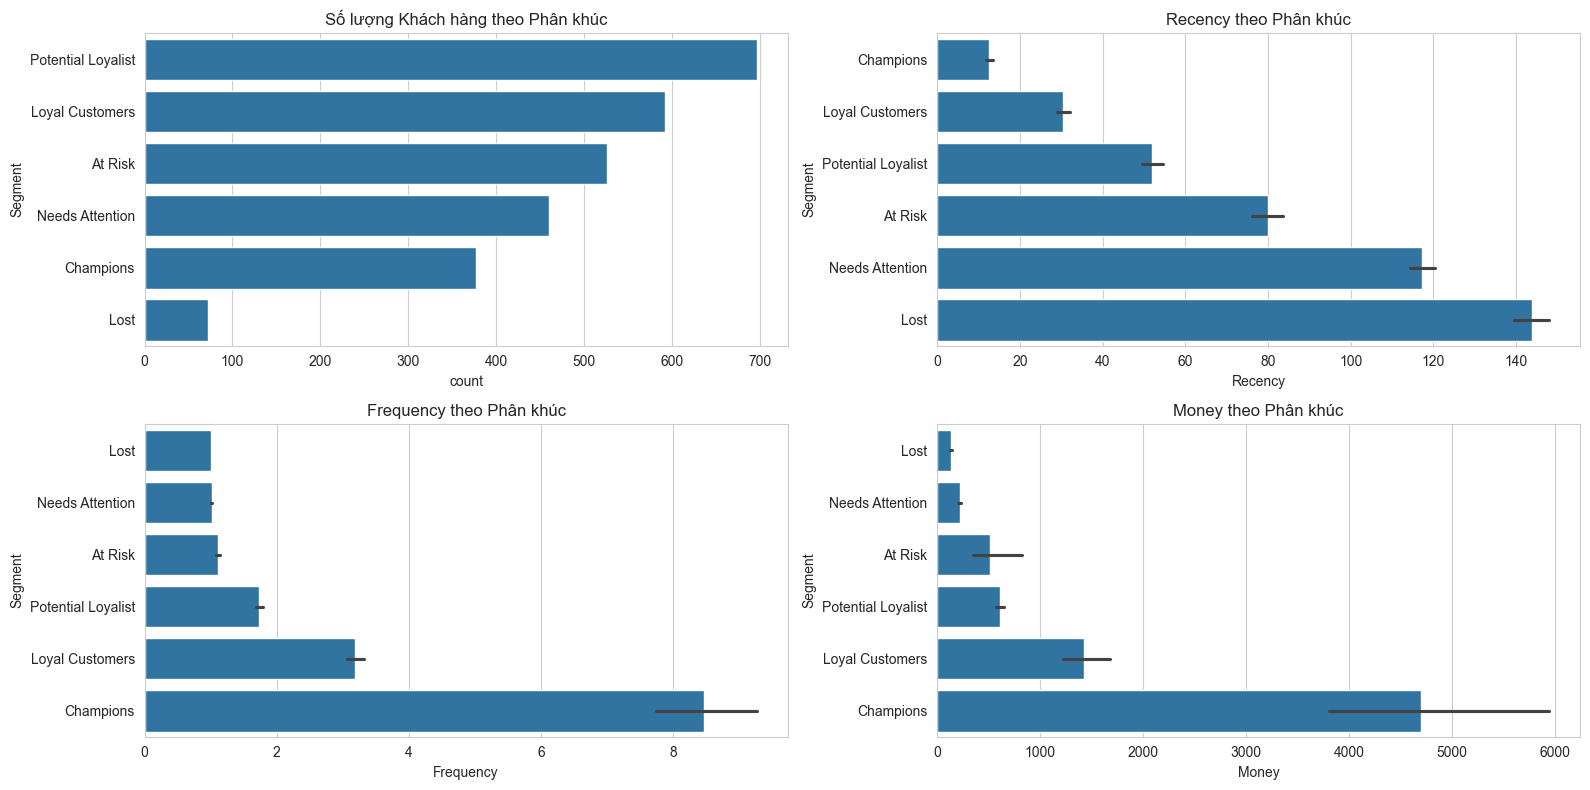

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = df['Quantity'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

#Vd ngày phân tích là ngày mai
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm_data = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x : (snapshot_date - x.max()).days, #recency
    'InvoiceNo' : 'nunique', #frequency
    'TotalPrice' : 'sum'
})

rfm_data.columns = ['Recency', 'Frequency', 'Money']  # đổi tên cột
display("RFM data: " ,rfm_data.head())

#Chấm điểm RFM
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q = 5, labels=r_labels, duplicates='drop').astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), q = 5, labels=f_labels, duplicates='drop').astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['Money'].rank(method='first'), q = 5, labels=m_labels, duplicates='drop').astype(int)
display(" RFM Data apply qcut " ,rfm_data.head())

#Nhóm khách hàng
rfm_data['RFM_Segment'] = (
    rfm_data['R_Score'].astype(str) +
    rfm_data['F_Score'].astype(str) +
    rfm_data['M_Score'].astype(str)
)
rfm_data['RFM_Score'] = (
    rfm_data['R_Score'].astype(int) +
    rfm_data['F_Score'].astype(int) +
    rfm_data['M_Score'].astype(int)
)

# Định nghĩa các phân khúc
def assign_segment(df):
    if df['RFM_Score'] >= 14:
        return 'Champions' # Vô địch
    elif df['RFM_Score'] >= 11:
        return 'Loyal Customers' # Khách hàng trung thành
    elif df['RFM_Score'] >= 8:
        return 'Potential Loyalist' # Có tiềm năng trung thành
    elif df['RFM_Score'] >= 6:
        return 'At Risk' # Có nguy cơ
    elif df['RFM_Score'] >= 4:
        return 'Needs Attention' # Cần chú ý
    else:
        return 'Lost' # Đã mất

rfm_data['Segment'] = rfm_data.apply(assign_segment, axis=1)
display(" RFM Data Apply Segment " ,rfm_data.head())

#Vẽ dashboard bằng GridSpec

# Số lượng Khách hàng theo Phân khúc
fig = plt.figure(figsize=(16,8))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
sns.countplot(y='Segment', data=rfm_data, order=rfm_data['Segment'].value_counts().index, ax = ax1)
ax1.set_title('Số lượng Khách hàng theo Phân khúc')

# Recency trung bình theo Phân khúc
ax2 = fig.add_subplot(gs[0,1])
sns.barplot(x='Recency', y='Segment', data=rfm_data, order=rfm_data.groupby('Segment')['Recency'].mean().sort_values().index, ax = ax2)
ax2.set_title('Recency theo Phân khúc')

# Frequency trung bình theo Phân khúc
ax3 = fig.add_subplot(gs[1,0])
sns.barplot(x='Frequency', y='Segment', data=rfm_data, order=rfm_data.groupby('Segment')['Frequency'].mean().sort_values().index, ax = ax3)
ax3.set_title('Frequency theo Phân khúc')

# Money trung bình theo Phân khúc
ax4 = fig.add_subplot(gs[1,1])
sns.barplot(x='Money', y='Segment', data=rfm_data, order=rfm_data.groupby('Segment')['Money'].mean().sort_values().index, ax = ax4)
ax4.set_title('Money theo Phân khúc')
plt.tight_layout()
plt.show()

# **Machine Learning**

![alt text](download-3.png)

**Sơ đồ quy trình chuẩn**

1. Xác định bài toán: Mục tiêu kinh doanh là gì? (Ví dụ: Giảm tỷ lệ khách hàng rời bỏ).
2. Thu thập & Làm sạch Dữ liệu:
3. Kỹ thuật Đặc trưng (Feature Engineering): Tạo ra các biến đầu vào (features) và biến mục tiêu (target) phù hợp.
4. Chuẩn hóa dữ liệu: Dữ liệu dạng số thì dùng **StandardScaler()**, dữ liệu dạng chữ thì One-Hot-Encoding (**VD: pd.get_dummies()**)
5. Chia Dữ liệu (train_test_split): Chia dữ liệu thành 2 phần.
6. Lựa chọn & Huấn luyện Mô hình: Chọn thuật toán từ sklearn và dùng tập huấn luyện để "dạy" mô hình (**VD: model.fit()**).
7. Đánh giá Mô hình: Dùng tập kiểm tra và các hàm metrics của sklearn để xem mô hình hoạt động tốt đến đâu.
8. Tinh chỉnh & Triển khai: Cải thiện mô hình và đưa vào sử dụng.

**Các tham số đánh giá:**
- **Bài toán phân loại**: accuracy, precision, recall, f1_score, confusion_matrix, roc_auc_score
- **Bài toán hồi quy**: MAE, MSE, RMSE, $R^2$

# *GIẢI THÍCH DỄ HIỂU*

|                 | Học giám sát | Học k giám sát        | Học tăng cường          |
| --------------- | ------------------- | ---------------------------- | ------------------------------- |
| Dữ liệu đầu vào | Có nhãn đầy đủ            | Không có nhãn                | K nhãn cụ thể chỉ có thưởng và phạt (penalty)            |
| Mục tiêu        | Dự đoán kết quả đầu ra     | Tìm nhóm, mẫu                | Tối ưu hành động để nhận thưởng |
| Cách học        | Học từ ví dụ cụ thể | Tự khám phá cấu trúc dữ liệu | Thử–sai, học từ phần thưởng     |
| Ví dụ           | Dự đoán điểm thi    | Nhóm sinh viên theo điểm     | Robot chơi game (chơi cờ)           |


**Bài toán**: Dựa vào tần suất mua hàng (Frequency) của khách hàng, hãy dự đoán tổng giá trị chi tiêu (MonetaryValue) của họ.

In [ ]:
#import thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Xác định features và target
X = rfm_data[['Frequency']]
y = rfm_data['Money']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}", f"X_test: {X_test.shape}", f"y_train: {y_train.shape}", f"y_test: {y_test.shape}")
# Mô hình học từ X_train để dự đoán y_train, rồi áp dụng lên X_test để dự đoán y_test_pred.
# Cuối cùng, so sánh y_test_pred với y_test (thật) để xem mô hình học tốt không.

# Khởi tạo mô hình
lr_model = LinearRegression()

# Huấn luyện mô hình trên tập training
lr_model.fit(X_train, y_train)

# In ra các hệ số đã học được
print("Hệ số chặn (Intercept):", lr_model.intercept_)
print("Hệ số góc (Coefficient):", lr_model.coef_)


X_train: (2179, 1) X_test: (545, 1) y_train: (2179,) y_test: (545,)
Hệ số chặn (Intercept): -432.31452293778466
Hệ số góc (Coefficient): [637.97083793]


**GIẢI THÍCH KẾT QUẢ TRÊN:**
- Công thức của Linear là: $$ŷ = coff.x - inter$$
Nếu bài toán là nói về dự đoán lương của nhân viên theo năm kinh nghiệm thì:
1. Với mỗi 1 đơn vị tăng trong biến đầu vào x, dự đoán đầu ra ŷ sẽ tăng 637.95 đơn vị (Nếu hệ số coff âm thì x và ŷ ngược chiều nhau **VD: bài toán tính giá xe đã qua sử dụng**)
=> Nhân viên làm thêm 1 năm sẽ tăng thêm 637.95 đơn vị tiền (VND, $,...)
2. Với x = 0 thì dự đoán đầu ra là -432
=> Nhân viên chưa làm được năm nào thì lương là -432 đơn vị tiền (VND,$,..) **Vô lí nhưng mô hình cần điểm chặn này và mô hình chỉ tính toán chứ không hiểu đời sống**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Dự đoán trên tập test (dữ liệu mô hình chưa từng thấy)
y_pred = lr_model.predict(X_test)

# Tính toán các chỉ số
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 756.8764517747871
R-squared (R2): 0.11599785092751314


**Diễn giải**: "Trung bình, mô hình dự đoán sai lệch khoảng MAE đơn vị tiền tệ. Mô hình giải thích được khoảng R2 * 100% sự biến động trong giá trị chi tiêu của khách hàng."


**Bài toán:** Dựa trên các chỉ số R, F, M, dự đoán xem một khách hàng có nguy cơ cao trở thành khách hàng đã mất ('Lost') hay không.


Kiểm tra sự cân bằng của dữ liệu mục tiêu:
Is_Lost
0    2192
1     532
Name: count, dtype: int64


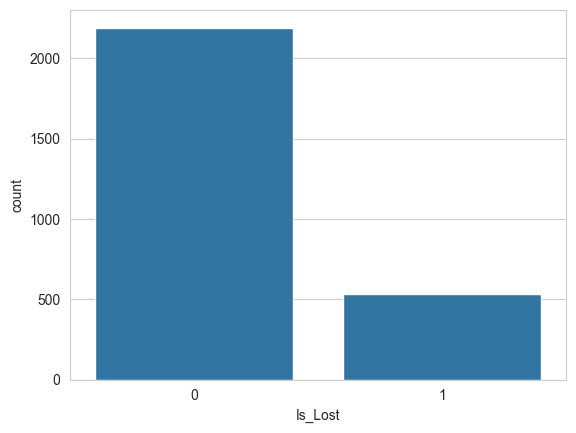

In [ ]:
# Bước 1: Tạo biến mục tiêu 'Is_Lost'
# Dựa trên cách phân khúc mới, chúng ta coi các khách hàng 'Lost', 'và 'Needs Attention' là có nguy cơ rời bỏ
lost_segments = ['Lost', 'Needs Attention']
rfm_data['Is_Lost'] = rfm_data['Segment'].apply(lambda x: 1 if x in lost_segments else 0)

print("\nKiểm tra sự cân bằng của dữ liệu mục tiêu:")
print(rfm_data['Is_Lost'].value_counts())

# vẽ biểu đồ tỉ lệ 0, 1 trong rfm_data['Is_Lost']
sns.countplot(x='Is_Lost', data=rfm_data)

# Xác định features và target
X = rfm_data[['Recency', 'Frequency', 'Money']] #Biến đầu vào
y = rfm_data['Is_Lost'] #Biến mục tiêu, biến đầu ra vì đề bài là dự đoán khách hàng rời bỏ

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)
# stratify=y được dùng để đảm bảo rằng tỉ lệ các lớp trong tập huấn luyện và tập kiểm tra sẽ giống với tỉ lệ ban đầu trong dữ liệu.
# stratify=y nên có trong bài toán phân loại (Classification) và k được có trong bài toán hồi quy (Regression)

# Chuẩn hóa dữ liệu (quan trọng cho Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Ghi chú quan trọng:
# .fit_transform() trên tập huấn luyện để scaler 'học' được các tham số (trung bình, độ lệch chuẩn) từ dữ liệu này.
# .transform() trên tập kiểm tra để áp dụng chính xác các tham số đã học, tránh rò rỉ thông tin từ tập kiểm tra vào quá trình huấn luyện.

**Giải thích dễ hiểu**
Tại sao cần chuẩn hóa (Normalization/Standardization)?
- Các thuật toán như Hồi quy Logistic, K-Means, KNN, PCA bị ảnh hưởng bởi thang đo của các đặc trưng
- Khi các đặc trưng (feature/column) trong dữ liệu có đơn vị, phạm vi giá trị khác nhau, một số thuật toán sẽ thiên vị những cột có giá trị lớn hơn, dù thực tế không hẳn là quan trọng hơn.
- *Các bài toán hồi quy auto cần chuẩn hóa còn bài toán phân loại thì tùy từng bài*

In [ ]:
# Huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=42)
display(logreg_model.fit(X_train_scaled, y_train))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# y_test: Nhãn thực tế
# y_pred: Nhãn mô hình dự đoán

# Dự đoán trên tập test
y_pred = logreg_model.predict(X_test_scaled)
# Tính các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# In ra kết quả
print("Confusion Matrix:\n", cm)
print("Accuracy :", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall   :", round(recall, 2))
print("F1-score :", round(f1, 2))


LogisticRegression(random_state=42)

Confusion Matrix:
 [[416  23]
 [ 36  70]]
Accuracy : 0.89
Precision: 0.75
Recall   : 0.66
F1-score : 0.7


- True Negative (TN) = 416: Dự đoán đúng khách hàng không rời bỏ.
- False Positive (FP) = 23: Dự đoán nhầm khách hàng sẽ rời bỏ, nhưng thực tế họ không rời bỏ.
- False Negative (FN) = 36: Dự đoán nhầm khách hàng không rời bỏ, nhưng thực tế họ đã rời bỏ.
- True Positive (TP) = 70: Dự đoán đúng khách hàng rời bỏ.

In [ ]:
lost_segments = ['Lost', 'Needs Attention']
rfm_data['Is_Lost'] = rfm_data['Segment'].apply(lambda x: 1 if x in lost_segments else 0)

print("\nKiểm tra sự cân bằng của dữ liệu mục tiêu:")
print(rfm_data['Is_Lost'].value_counts())

X = rfm_data[['Recency', 'Frequency', 'Money']]
y = rfm_data['Is_Lost']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression
logreg_modelV2 = LogisticRegression(random_state=42, class_weight='balanced')  # class_weight='balanced' để xử lý mất cân bằng lớp
# Lưu ý: class_weight='balanced' sẽ tự động điều chỉnh trọng số của các lớp dựa trên tỉ lệ của chúng trong dữ liệu. Điều này giúp mô hình không bị thiên lệch về lớp chiếm ưu thế.
logreg_modelV2.fit(X_train_scaled, y_train)  # y_train phải là nhãn phân loại (Is_Lost)


Kiểm tra sự cân bằng của dữ liệu mục tiêu:
Is_Lost
0    2192
1     532
Name: count, dtype: int64


LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
#Đánh giá model
"""
1. Hiệu năng mô hình
- Accuracy = 0.89 → Mô hình đoán đúng 89% tổng số trường hợp. Tuy nhiên, do dữ liệu mất cân bằng, chỉ số này chưa đủ phản ánh chất lượng thật.
- Precision = 0.75 → Trong số khách hàng được dự đoán là sẽ rời bỏ, có 75% là đúng. Mô hình khá tốt trong việc tránh báo động giả.
- Recall = 0.66 → Mô hình chỉ phát hiện 66% số khách hàng thực sự rời bỏ, tức là bỏ sót 34%, cần cải thiện.
- F1-score = 0.70 → Trung bình hài hòa giữa precision và recall → mức trung bình-khá.

2. Confusion Matrix cho thấy:
- 70 khách rời bỏ được dự đoán đúng (True Positive).
- 36 khách rời bỏ bị dự đoán sai là ở lại (False Negative) → đây là điểm yếu cần chú ý.
- Mô hình hoạt động tốt với lớp khách không rời bỏ (416/439 = 95%).

✅ Kết luận:
- Mô hình dự đoán khá tốt, đặc biệt trong việc xác định khách hàng trung thành.
- Tuy nhiên, còn bỏ sót nhiều khách hàng rời bỏ, điều này có thể dẫn đến mất doanh thu nếu không được phát hiện kịp.
- Nên xem xét cải thiện recall bằng các phương pháp như: điều chỉnh threshold, xử lý mất cân bằng, hoặc dùng mô hình mạnh hơn.

"""

'\n1. Hiệu năng mô hình\n- Accuracy = 0.89 → Mô hình đoán đúng 89% tổng số trường hợp. Tuy nhiên, do dữ liệu mất cân bằng, chỉ số này chưa đủ phản ánh chất lượng thật.\n- Precision = 0.75 → Trong số khách hàng được dự đoán là sẽ rời bỏ, có 75% là đúng. Mô hình khá tốt trong việc tránh báo động giả.\n- Recall = 0.66 → Mô hình chỉ phát hiện 66% số khách hàng thực sự rời bỏ, tức là bỏ sót 34%, cần cải thiện.\n- F1-score = 0.70 → Trung bình hài hòa giữa precision và recall → mức trung bình-khá.\n\n2. Confusion Matrix cho thấy:\n- 70 khách rời bỏ được dự đoán đúng (True Positive).\n- 36 khách rời bỏ bị dự đoán sai là ở lại (False Negative) → đây là điểm yếu cần chú ý.\n- Mô hình hoạt động tốt với lớp khách không rời bỏ (416/439 = 95%).\n\n✅ Kết luận: \n- Mô hình dự đoán khá tốt, đặc biệt trong việc xác định khách hàng trung thành. \n- Tuy nhiên, còn bỏ sót nhiều khách hàng rời bỏ, điều này có thể dẫn đến mất doanh thu nếu không được phát hiện kịp. \n- Nên xem xét cải thiện recall bằng các p

# **HỆ THỐNG KHUYẾN NGHỊ**

Matrix Calculation là web tính matrix

**Hệ thống Khuyến nghị là lọc thông tin nhằm dự đoán "sự yêu thích" mà một người dùng sẽ dành cho một sản phẩm và gợi ý các sản phẩm mà người dùng có khả năng thích nhất.** Có 2 cách tiếp cận chính:
1. Lọc dựa trên Nội dung (Content-Based Filtering): "Gợi ý những thứ giống như bạn đã thích"
- Logic: Nếu bạn thích một sản phẩm, bạn cũng có thể sẽ thích các sản phẩm có thuộc tính/mô tả tương tự.
- Ví dụ: Bạn xem phim "Iron Man" (thể loại: hành động, siêu anh hùng). Hệ thống sẽ gợi ý "Captain America".

2. Lọc Cộng tác (Collaborative Filtering): "Gợi ý những thứ mà những người giống bạn đã thích"
- Logic: Tìm những người dùng có hành vi (mua, xem, đánh giá) tương tự bạn. Sau đó, gợi ý cho bạn những sản phẩm mà họ đã thích nhưng bạn chưa từng tương tác.
- Ví dụ: An và Bình đều thích "Iron Man" và "Captain America". An vừa xem thêm "Thor". Hệ thống sẽ gợi ý "Thor" cho Bình.



# Lọc dựa trên nội dung

Ví dụ TF-IDF: Biến văn bản thành Vector

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

alo = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
alo['Description'] = alo['Description'].fillna('').str.lower()

a = TfidfVectorizer(stop_words='english')
ab = a.fit_transform(alo['Description']).toarray()

from sklearn.metrics.pairwise import cosine_similarity

abc = pd.DataFrame(cosine_similarity(ab, ab), index=alo.index, columns=alo.index)

def ham_goi_y(stockcode, abc):
    ac = abc[stockcode].sort_values(ascending = False)
    top_5 = ac.index[1:6]
    return alo.loc[top_5]

display(ham_goi_y('22423', abc))

,Description
StockCode,
22776,sweetheart cakestand 3 tier
22838,3 tier cake tin red and cream
22839,3 tier cake tin green and cream
23245,set of 3 regency cake tins
23172,regency tea plate pink


![alt text](download-4.png)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Nhập công cụ TF-IDF từ thư viện scikit-learn để trích xuất đặc trưng văn bản

# Lấy các sản phẩm duy nhất (loại bỏ trùng lặp)
product_descriptions = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
# Chọn hai cột 'StockCode' và 'Description', loại bỏ các dòng trùng lặp, sau đó đặt 'StockCode' làm chỉ số (index)

# Xử lý giá trị thiếu trong mô tả và chuyển thành chữ thường
product_descriptions['Description'] = product_descriptions['Description'].fillna('').str.lower()
# Thay thế các giá trị thiếu (NaN) trong cột 'Description' bằng chuỗi rỗng '', sau đó chuyển toàn bộ chữ về dạng chữ thường

display(product_descriptions.head())  # Hiển thị 5 dòng đầu tiên của DataFrame product_descriptions để kiểm tra kết quả

display(product_descriptions.info())  # Hiển thị thông tin tổng quan về DataFrame product_descriptions, bao gồm số lượng dòng, cột, kiểu dữ liệu và giá trị không phải NaN

# Khởi tạo và áp dụng TF-IDF
tfidf = TfidfVectorizer(stop_words='english')  # Tạo một đối tượng TF-IDF, tự động loại bỏ các từ dừng (stop words) trong tiếng Anh
tfidf_matrix = tfidf.fit_transform(product_descriptions['Description'])
# Áp dụng TF-IDF lên cột 'Description' để tạo ma trận TF-IDF biểu diễn đặc trưng cho từng sản phẩm
display(tfidf_matrix.toarray())  # Chuyển đổi ma trận TF-IDF sang dạng mảng NumPy để dễ dàng xem xét

display(tfidf_matrix.shape)  # Hiển thị kích thước của ma trận TF-IDF, bao gồm số lượng sản phẩm và số lượng từ (features) đã học được

#Tính Cosine Similarity & Xây dựng hàm gợi ý
from sklearn.metrics.pairwise import cosine_similarity  # Nhập hàm tính độ tương tự cosine từ thư viện scikit-learn

# Tính ma trận độ tương tự
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Tính độ tương tự cosine giữa tất cả các mô tả sản phẩm (dựa trên ma trận TF-IDF), kết quả là một ma trận vuông

# Chuyển thành DataFrame để dễ tra cứu
cosine_sim_df = pd.DataFrame(cosine_sim, index=product_descriptions.index, columns=product_descriptions.index)
# Chuyển ma trận độ tương tự thành DataFrame với chỉ số hàng và cột là mã sản phẩm (StockCode), giúp dễ dàng tra cứu độ tương tự giữa các sản phẩm

def get_content_based_recommendations(stock_code, cosine_sim_df):  # Định nghĩa hàm gợi ý dựa trên nội dung, đầu vào là mã sản phẩm và ma trận độ tương tự
    sim_scores = cosine_sim_df[stock_code].sort_values(ascending=False)
    # Lấy các độ tương tự giữa sản phẩm được chọn và tất cả sản phẩm khác, sau đó sắp xếp giảm dần theo độ tương tự
    top_5_similar_products = sim_scores[1:6]
    # Lấy 5 sản phẩm giống nhất, bỏ qua sản phẩm đầu tiên (chính nó, có độ tương tự bằng 1)
    return product_descriptions.loc[top_5_similar_products.index]
    # Trả về thông tin mô tả của 5 sản phẩm tương tự nhất dựa trên chỉ số là mã sản phẩm

# Thử nghiệm hàm
display(get_content_based_recommendations('22423', cosine_sim_df))  # Gọi hàm để lấy 5 sản phẩm giống nhất với sản phẩm có mã '22423' (REGENCY CAKESTAND 3 TIER)

,Description
StockCode,
22386,jumbo bag pink polkadot
21499,blue polkadot wrap
21498,red retrospot wrap
22379,recycling bag retrospot
20718,red retrospot shopper bag


<class 'pandas.core.frame.DataFrame'>
Index: 3210 entries, 22386 to 22816
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  3210 non-null   object
dtypes: object(1)
memory usage: 50.2+ KB


None

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(3210, 1799)

,Description
StockCode,
22776,sweetheart cakestand 3 tier
22838,3 tier cake tin red and cream
22839,3 tier cake tin green and cream
23245,set of 3 regency cake tins
23172,regency tea plate pink


# Lọc cộng tác

- Dữ liệu Tường minh (Explicit Feedback): Người dùng chủ động cung cấp đánh giá.

- Dữ liệu Ngầm (Implicit Feedback): Sở thích được suy ra từ hành vi của người dùng.

Các loại lọc cộng tác:
1. Dựa trên Vùng lân cận (Neighborhood-Based):
- User-Based: Tìm những người dùng (Neighbors) có lịch sử rating giống bạn nhất, sau đó gợi ý các sản phẩm mà họ thích.
- Item-Based: Tìm những sản phẩm được rating tương tự nhau bởi cùng nhóm người dùng. Nếu bạn thích sản phẩm A, hệ thống sẽ gợi ý sản phẩm C (tương tự A).

2. Dựa trên Mô hình (Model-Based) / Phân rã Ma trận (Matrix Factorization):
- Sử dụng các kỹ thuật Machine Learning (như SVD) để tìm ra các đặc trưng ẩn (latent features) của cả người dùng và sản phẩm.
- Dự đoán rating bằng cách nhân ma trận đặc trưng ẩn của người dùng và sản phẩm.
- Đây là phương pháp hiện đại và mạnh mẽ nhất. Chúng ta sẽ tập trung vào phương pháp này.

In [ ]:
# Tạo cột rating dựa trên số lần mua
rating_df = df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='rating')
# Nhóm dữ liệu theo cặp (CustomerID, StockCode), đếm số lần mỗi khách hàng mua từng sản phẩm → tạo cột 'rating' thể hiện tần suất mua

# Dùng pivot_table để tạo ma trận
user_item_matrix = rating_df.pivot_table(
    index='CustomerID',        # Mỗi dòng tương ứng với một khách hàng
    columns='StockCode',       # Mỗi cột tương ứng với một sản phẩm
    values='rating'            # Giá trị trong ô là số lần khách hàng đã mua sản phẩm (tức là rating)
).fillna(0)                    # Điền giá trị 0 cho những ô không có dữ liệu (khách chưa mua sản phẩm đó)

display(user_item_matrix.head())  # Hiển thị 5 dòng đầu tiên của ma trận user-item để kiểm tra kết quả

from sklearn.decomposition import TruncatedSVD  # Nhập lớp TruncatedSVD từ thư viện scikit-learn để thực hiện phân rã giá trị suy biến (SVD rút gọn)

# Khởi tạo TruncatedSVD
# n_components là số lượng đặc trưng ẩn muốn giữ lại
svd = TruncatedSVD(n_components=50, random_state=42)
# Tạo một đối tượng TruncatedSVD để giảm chiều ma trận, giữ lại 50 thành phần chính (đặc trưng ẩn), dùng random_state=42 để kết quả có thể tái lập

# Phân rã ma trận
matrix_decomposed = svd.fit_transform(user_item_matrix)
# Áp dụng SVD lên ma trận người-dùng × sản phẩm → trả về ma trận U * Σ (ẩn dưới dạng matrix_decomposed), biểu diễn người dùng trong không gian 50 chiều

# lưu ý: matrix_decomposed = U * diag, còn V^T được lưu trong svd.components_
# matrix_decomposed chứa phần tích giữa U và ma trận đường chéo Σ (singular values);
# còn V^T (biểu diễn sản phẩm trong không gian đặc trưng) được lưu trong thuộc tính svd.components_

# Tái tạo lại ma trận rating đầy đủ
matrix_reconstructed = svd.inverse_transform(matrix_decomposed)
# Dùng kết quả phân rã (matrix_decomposed = U * Σ) để nhân ngược với V^T nhằm tái tạo lại gần đúng ma trận gốc (user-item),
# tức là tính U * Σ * V^T ≈ user_item_matrix

# Chuyển thành DataFrame để dễ tra cứu
df_reconstructed = pd.DataFrame(matrix_reconstructed,
                                index=user_item_matrix.index,     # Gán chỉ số hàng là CustomerID (người dùng)
                                columns=user_item_matrix.columns) # Gán chỉ số cột là StockCode (sản phẩm)
# Biến kết quả tái tạo thành DataFrame để có thể dễ dàng tra cứu, lọc hoặc phân tích tiếp theo

def get_sklearn_recommendations(customer_id, df_reconstructed, user_item_matrix, n=10):
    # Định nghĩa hàm gợi ý sản phẩm cho một khách hàng cụ thể dựa trên ma trận tái tạo từ SVD

    # Lấy hàng tương ứng với khách hàng
    user_ratings = df_reconstructed.loc[customer_id]
    # Lấy toàn bộ các dự đoán điểm đánh giá (rating) cho khách hàng được chọn từ ma trận đã tái tạo

    # Lọc ra các sản phẩm khách hàng đã mua
    bought_items = user_item_matrix.loc[customer_id][user_item_matrix.loc[customer_id] > 0].index
    # Lấy danh sách các sản phẩm mà khách hàng đã mua (tức là có rating > 0 trong ma trận gốc)

    # Sắp xếp và gợi ý các sản phẩm chưa mua
    recommendations = user_ratings.drop(bought_items).sort_values(ascending=False).head(n)
    # Loại bỏ các sản phẩm đã mua khỏi danh sách dự đoán, sau đó sắp xếp theo điểm rating giảm dần và lấy top n sản phẩm gợi ý

    return recommendations  # Trả về danh sách các sản phẩm được gợi ý

# Thử nghiệm hàm
customer_id_to_test = 12471  # Đặt ID của khách hàng cần được gợi ý (dùng kiểu int)
customer_id_str = str(customer_id_to_test)  # Chuyển sang kiểu str để tra cứu đúng index
recs = get_sklearn_recommendations(customer_id_str, df_reconstructed, user_item_matrix)
# Gọi hàm để lấy danh sách gợi ý cho khách hàng

print(f"Top 10 gợi ý cho khách hàng {customer_id_to_test}:\n{recs}")
# In ra danh sách 10 sản phẩm được gợi ý kèm theo mã sản phẩm và điểm dự đoán


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214N,90214P,90214R,90214V,90214Y,BANK CHARGES,C2,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0


Top 10 gợi ý cho khách hàng 12471:
StockCode
22960    1.175155
22722    1.099319
22556    1.033013
22727    0.839756
22957    0.784847
22328    0.767381
22969    0.689744
37448    0.626918
22303    0.585026
21977    0.573019
Name: 12471, dtype: float64


# **Đánh giá mô hình lọc cộng tác**

Đây là bài toán gợi ý nên sẽ chia train/test kiểu (x 0.8 để tìm tập Train) kp dùng sklearn vì sklearn chia ngẫu nhiên từ đó có thể dẫn tới *data leakage*. Với tất cả các bài toán có liên quan đến yếu tố thời gian vì mô hình gợi ý cần “học” từ những gì khách mua trước để dự đoán những gì khách mua sau (giống thực tế).

Mean Precision@10: 0.0640
Mean Recall@10: 0.0633


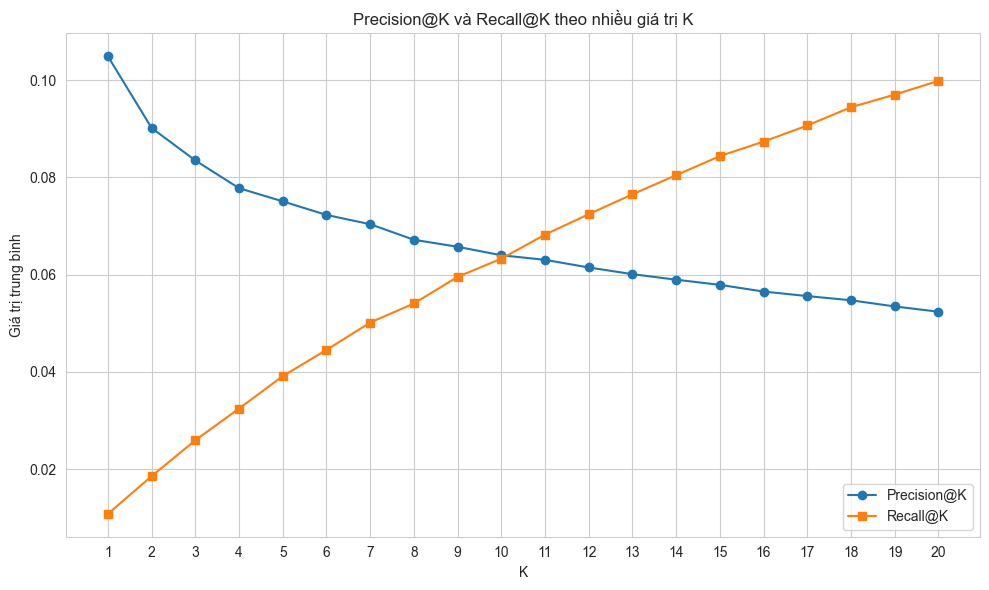

In [ ]:
# Lọc ra những khách hàng có đủ giao dịch để chia (ví dụ: >= 20)
user_transaction_counts = df['CustomerID'].value_counts()
# Đếm số lần xuất hiện của từng CustomerID (số giao dịch mỗi khách hàng)
active_users = user_transaction_counts[user_transaction_counts >= 20].index
# Chọn ra những khách hàng có số giao dịch ≥ 20
df_active = df[df['CustomerID'].isin(active_users)]
# Lọc lại DataFrame chỉ chứa các giao dịch của những khách hàng đủ điều kiện

train_data = []  # Danh sách để lưu dữ liệu train cho tất cả người dùng
test_data = []   # Danh sách để lưu dữ liệu test cho tất cả người dùng

def split_user_data(user_df):
    user_df = user_df.sort_values('InvoiceDate')
    # Sắp xếp dữ liệu của người dùng theo thời gian
    split_idx = int(len(user_df) * 0.8)
    # Xác định chỉ số để chia 80% làm train
    train_data.append(user_df.iloc[:split_idx])
    # Lưu 80% dữ liệu đầu làm train
    test_data.append(user_df.iloc[split_idx:])
    # Lưu 20% dữ liệu cuối làm test

df_active.groupby('CustomerID').apply(split_user_data)
# Áp dụng hàm chia dữ liệu cho từng nhóm khách hàng riêng biệt

train_df = pd.concat(train_data)  # Nối toàn bộ các phần train lại thành một DataFrame
test_df = pd.concat(test_data)    # Nối toàn bộ các phần test lại thành một DataFrame

# Tạo ma trận train để huấn luyện
train_user_item_matrix = train_df.pivot_table(
    index='CustomerID',                  # Mỗi hàng là một khách hàng
    columns='StockCode',                 # Mỗi cột là một sản phẩm
    values='InvoiceNo',                  # Dựa vào mã đơn hàng để đếm số lần mua
    aggfunc='nunique',                   # Đếm số lượng đơn hàng khác nhau (tương ứng số lần mua)
    fill_value=0                         # Nếu khách không mua sản phẩm thì điền 0
)

# Huấn luyện SVD
svd_eval = TruncatedSVD(n_components=50, random_state=42)
# Khởi tạo đối tượng Truncated SVD với 50 thành phần ẩn

train_matrix_decomposed = svd_eval.fit_transform(train_user_item_matrix)
# Phân rã ma trận train thành U * Σ (giảm chiều)

train_matrix_reconstructed = svd_eval.inverse_transform(train_matrix_decomposed)
# Tái tạo lại ma trận gần đúng ban đầu bằng U * Σ * V^T

df_reconstructed_eval = pd.DataFrame(
    train_matrix_reconstructed,
    index=train_user_item_matrix.index,
    columns=train_user_item_matrix.columns
)
# Chuyển ma trận tái tạo thành DataFrame để dễ tra cứu

# Tạo dict chứa các sản phẩm thực tế trong tập test
test_user_items = test_df.groupby('CustomerID')['StockCode'].unique().apply(list).to_dict()
# Gom các sản phẩm mỗi người dùng đã mua trong tập test thành danh sách, rồi chuyển thành dict để dễ tra cứu

precisions = []  # Danh sách lưu precision@10 cho từng người
recalls = []     # Danh sách lưu recall@10 cho từng người
k = 10           # Số lượng gợi ý (top-K)

for user_id, true_items in test_user_items.items():
    # Duyệt qua từng người dùng và danh sách sản phẩm thật sự họ mua trong tập test

    if user_id in df_reconstructed_eval.index:
        # Chỉ đánh giá với người dùng có mặt trong ma trận tái tạo (tức là có dữ liệu train)

        recommendations = get_sklearn_recommendations(user_id, df_reconstructed_eval, train_user_item_matrix, k)
        # Gọi hàm gợi ý để lấy top-K sản phẩm được đề xuất cho người dùng

        hits = len(set(recommendations.index) & set(true_items))
        # Đếm số sản phẩm được gợi ý mà thực sự có trong danh sách test (giao nhau)

        p_at_k = hits / k
        # Precision@10 = số đúng / tổng số gợi ý

        r_at_k = hits / len(true_items)
        # Recall@10 = số đúng / tổng số sản phẩm thật sự người dùng đã mua

        precisions.append(p_at_k)
        recalls.append(r_at_k)

print(f"Mean Precision@10: {np.mean(precisions):.4f}")
# In ra độ chính xác trung bình top-10 trên toàn bộ người dùng

print(f"Mean Recall@10: {np.mean(recalls):.4f}")
# In ra độ bao phủ trung bình top-10 trên toàn bộ người dùng

# Danh sách các giá trị K muốn đánh giá
k_values = list(range(1, 21))  # Từ 1 đến 20
mean_precisions = []
mean_recalls = []

for k in k_values:
    precisions = []
    recalls = []

    for user_id, true_items in test_user_items.items():
        if user_id in df_reconstructed_eval.index:
            recs = get_sklearn_recommendations(user_id, df_reconstructed_eval, train_user_item_matrix, n=k)
            hits = len(set(recs.index) & set(true_items))

            p_at_k = hits / k
            r_at_k = hits / len(true_items) if len(true_items) > 0 else 0

            precisions.append(p_at_k)
            recalls.append(r_at_k)

    # Tính trung bình cho từng K
    mean_precisions.append(np.mean(precisions))
    mean_recalls.append(np.mean(recalls))

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_precisions, marker='o', label='Precision@K')
plt.plot(k_values, mean_recalls, marker='s', label='Recall@K')

plt.title('Precision@K và Recall@K theo nhiều giá trị K')
plt.xlabel('K')
plt.ylabel('Giá trị trung bình')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

![alt text](download-5.png)

# **Xây dựng giao diện người dùng tương tác**

In [ ]:
# Import các thư viện cần thiết
import ipywidgets as widgets
from IPython.display import display
# Tạo dropdown chứa danh sách khách hàng
customer_dropdown = widgets.Dropdown(
    options=user_item_matrix.index.tolist(),
    description='Chọn KH:',
    disabled=False,
)

# Tạo nút bấm
recommend_button = widgets.Button(
    description='Lấy gợi ý',
    disabled=False,
    button_style='success',
    tooltip='Click để xem gợi ý cho khách hàng này',
    icon='check'
)

# Tạo vùng hiển thị kết quả
output_area = widgets.Output()

# Hàm xử lý sự kiện click
def on_button_clicked(b):
    with output_area:
        # Xóa kết quả cũ
        output_area.clear_output()

        # Lấy customer_id từ dropdown
        selected_customer = customer_dropdown.value

        # Gọi hàm gợi ý đã có
        recommendations = get_sklearn_recommendations(
            selected_customer,
            df_reconstructed,
            user_item_matrix
        )

        # Hiển thị kết quả
        print(f"Gợi ý cho Khách hàng: {selected_customer}")
        print("---------------------------------------")
        print(recommendations)

# Liên kết hàm với sự kiện click của nút
recommend_button.on_click(on_button_clicked)

# Hiển thị giao diện
display(customer_dropdown, recommend_button, output_area)

Dropdown(description='Chọn KH:', options=('12346', '12347', '12348', '12350', '12352', '12353', '12354', '1235…

Button(button_style='success', description='Lấy gợi ý', icon='check', style=ButtonStyle(), tooltip='Click để x…

Output()